# Analyses de contributions

Nous allons réaliser sur notre exemple de béton armé les différentes analyses de contributions vues en cours. Pour rappel, nous nous appuyons sur l'article de van der Meide et al., 2025 (https://link.springer.com/article/10.1007/s11367-025-02487-y#Sec46).

Le procédé étudié a été défini au TD2, il s'agit de la production d'1 m3 de béton armé type A.

Béton | Flux | Procédé choisi dans ecoinvent | Région | Unité | Qté pour 1m3
:---: | :---: | :---: | :---: | :---: | :---:
Béton A | ciment Portland | market for cement, Portland | Europe without Switzerland | kg | 350
Béton A | eau | market for tap water | Europe without Switzerland | kg | 175
Béton A | sable | market for sand | Rest-of-World (RoW) | kg | 800 
Béton A | graviers | market for gravel, crushed | Rest-of-World (RoW) | kg | 1100
Béton A | ferraillage | market for reinforcing steel | Global | kg | 100
Béton A | énergie | diesel, burned in building machine | Global | MJ | 14.4


SCHEMA 

In [15]:
import bw2io as bi # ensemble des fonctions et classes pour importer et exporter (input/output)
import bw2data as bd # ... pour gérer les données du projet
import bw2calc as bc # ... pour faire des opérations
import bw2analyzer as ba # ... pour interpréter les résultats
import pandas as pd

bd.projects.set_current('2025-06-10_ecoinvent_311')
eidb = bd.Database('ecoinvent-3.11-cutoff')
biodb = bd.Database('ecoinvent-3.11-biosphere')
fgdb = bd.Database('betons_armes')

beton_A = fgdb.search("Béton A")[0]
meth = [m for m in bd.methods if 'EF v3.1' in m[1] and 'no LT' not in m[1]]
gwp100 = [ind for ind in meth if 'GWP100' in str(ind) and 'biogenic' not in str(ind) and 'fossil' not in str(ind) and 'land' not in str(ind)][0]

## AC directe

### Calcul de la matrice de contribution

Afi

In [17]:
lca = bc.LCA(demand = {beton_A : 1.0},method= gwp100)
lca.lci()
lca.lcia()
s=lca.score
s

561.9650284777491

In [18]:
contrib_mat =lca.characterized_inventory
print(contrib_mat)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 21368 stored elements and shape (3238, 25414)>
  Coords	Values
  (50, 5)	9.213880685838001e-08
  (50, 11)	8.20829491379092e-06
  (50, 12)	0.00010482082822996388
  (50, 22)	9.386476893263494e-10
  (50, 50)	9.79438282853415e-07
  (50, 54)	0.00046231406811714606
  (50, 70)	5.8199312760650037e-11
  (50, 92)	8.637247972729461e-05
  (50, 105)	0.00041252481102166914
  (50, 158)	1.991416368497488e-05
  (50, 168)	4.009092535897374e-22
  (50, 185)	0.00013158603362556316
  (50, 213)	8.544281083449291e-06
  (50, 248)	1.1297834108841477e-06
  (50, 252)	1.0075655515853293e-05
  (50, 255)	1.786807165549472e-13
  (50, 261)	2.355494457644247e-07
  (50, 274)	2.867291056587066e-07
  (50, 300)	2.607300437599351e-09
  (50, 304)	1.0853772358158864e-06
  (50, 308)	0.0056097673755723275
  (50, 310)	0.00017468578802471674
  (50, 329)	1.3184207263194e-09
  (50, 347)	8.185670719011738e-05
  (50, 421)	8.138578694763057e-10
  :	:
  (3214, 13300)	2.82384

### AC des flux élémentaires désagrégés

 AC de chaque flux élémentaire de chaque procédé à l'indicateur étudié

In [19]:
h_df = lca.to_dataframe(matrix_label='characterized_inventory',cutoff_mode='fraction',cutoff=0.01)
h_df['relativ_amount'] =h_df['amount']/s
h_df['cell_name'] = h_df['row_name'] + "-" + h_df['col_name']
h_df

,row_index,col_index,amount,row_id,col_id,row_database,row_code,row_name,row_location,row_unit,...,row_product,col_database,col_code,col_name,col_location,col_unit,col_type,col_reference_product,relativ_amount,cell_name
0,2013,6037,265.455018,190810763426656344,190810881869606912,ecoinvent-3.11-biosphere,349b29d1-3e58-4c66-98b9-9d1a076efd2e,"Carbon dioxide, fossil",None,kilogram,...,None,ecoinvent-3.11-cutoff,8e4525e15e1bcd4c996adccc11207e95,clinker production,Europe without Switzerland,kilogram,processwithreferenceproduct,clinker,0.472369,"Carbon dioxide, fossil-clinker production"
1,2013,8603,60.681004,190810763426656344,190810889826201602,ecoinvent-3.11-biosphere,349b29d1-3e58-4c66-98b9-9d1a076efd2e,"Carbon dioxide, fossil",None,kilogram,...,None,ecoinvent-3.11-cutoff,5ed052d5f3b313699d3bfeeee056360a,pig iron production,RoW,kilogram,processwithreferenceproduct,pig iron,0.107980,"Carbon dioxide, fossil-pig iron production"
2,2013,4331,18.295654,190810763426656344,190810875745923072,ecoinvent-3.11-biosphere,349b29d1-3e58-4c66-98b9-9d1a076efd2e,"Carbon dioxide, fossil",None,kilogram,...,None,ecoinvent-3.11-cutoff,f643e40b24c5f097085bf500b33b8cdc,iron sinter production,RoW,kilogram,processwithreferenceproduct,iron sinter,0.032557,"Carbon dioxide, fossil-iron sinter production"
3,3190,23441,10.899428,190810763636371495,190810941642633218,ecoinvent-3.11-biosphere,70ef743b-3ed5-4a6d-b192-fb6d62378555,"Methane, fossil",None,kilogram,...,None,ecoinvent-3.11-cutoff,b82b51343d199a7aa291b3d26d26d6b1,natural gas venting from petroleum/natural gas...,GLO,cubic meter,processwithreferenceproduct,"natural gas, vented",0.019395,"Methane, fossil-natural gas venting from petro..."
4,659,13629,8.639141,190810763149832265,190810909472321536,ecoinvent-3.11-biosphere,aa7cac3a-3625-41d4-bc54-33e2cf11ec46,"Carbon dioxide, fossil",None,kilogram,...,None,ecoinvent-3.11-cutoff,cfe71326bd6404f1fe1d8f7379891a58,"quicklime production, in pieces, loose",RoW,kilogram,processwithreferenceproduct,"quicklime, in pieces, loose",0.015373,"Carbon dioxide, fossil-quicklime production, i..."
5,2013,2692,8.014009,190810763426656344,190810870259773440,ecoinvent-3.11-biosphere,349b29d1-3e58-4c66-98b9-9d1a076efd2e,"Carbon dioxide, fossil",None,kilogram,...,None,ecoinvent-3.11-cutoff,2c5b29553298fe78ac40d6253ddca452,"diesel, burned in building machine",GLO,megajoule,processwithreferenceproduct,"diesel, burned in building machine",0.014261,"Carbon dioxide, fossil-diesel, burned in build..."
6,2013,19575,7.318437,190810763426656344,190810928858394624,ecoinvent-3.11-biosphere,349b29d1-3e58-4c66-98b9-9d1a076efd2e,"Carbon dioxide, fossil",None,kilogram,...,None,ecoinvent-3.11-cutoff,1a5f3a33cdad3b88f159e63f38715f7c,pig iron production,RER,kilogram,processwithreferenceproduct,pig iron,0.013023,"Carbon dioxide, fossil-pig iron production"
7,3190,23371,6.925600,190810763636371495,190810941428723712,ecoinvent-3.11-biosphere,70ef743b-3ed5-4a6d-b192-fb6d62378555,"Methane, fossil",None,kilogram,...,None,ecoinvent-3.11-cutoff,b2f165abc65c44f0fc255b2b852bc1be,hard coal mine operation and hard coal prepara...,CN,kilogram,processwithreferenceproduct,hard coal,0.012324,"Methane, fossil-hard coal mine operation and h..."
8,2489,3086,6.336005,190810763514736740,190810871513870336,ecoinvent-3.11-biosphere,f9749677-9c9f-4678-ab55-c607dfdc2cb9,"Carbon dioxide, fossil",None,kilogram,...,None,ecoinvent-3.11-cutoff,1ec8ef47e1fae8ca2b8d0254edb9f6f1,"heat production, at hard coal industrial furna...",RoW,megajoule,processwithreferenceproduct,"heat, district or industrial, other than natur...",0.011275,"Carbon dioxide, fossil-heat production, at har..."
9,659,17127,6.171049,190810763149832265,190810921421893632,ecoinvent-3.11-biosphere,aa7cac3a-3625-41d4-bc54-33e2cf11ec46,"Carbon dioxide, fossil",None,kilogram,...,None,ecoinvent-3.11-cutoff,95f8765b6a83c37709b64ba7aabb9845,"coke production, wet quenching",CN,megajoule,processwithreferenceproduct,coke,0.010981,"Carbon dioxide, fossil-coke productio

In [20]:
reste = s-sum(h_df['amount'])
reste

163.22968372095363

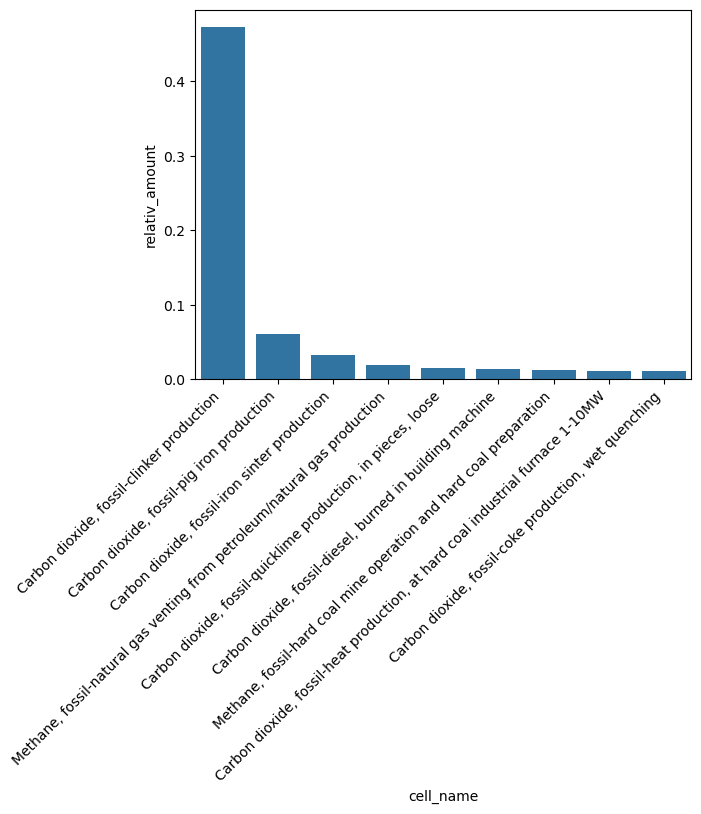

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
sns.barplot(data=h_df,x = 'cell_name',y = 'relativ_amount',errorbar=None)

plt.xticks(rotation=45, ha='right');


### AC des flux élémentaires agrégés

AC des flux élémentaires agrégés sur l'ensemble des procédés

In [23]:
contrib_mat =lca.characterized_inventory # matrice d'inventaire caractérisé ie matrice de contribution

contrib_EF = contrib_mat.sum(axis=1) # On fait la somme de chacune des lignes pour avoir la contribution des EF agrégés sur l'ensemble des procédés
names = [bd.get_node(id = i)['name'] for i in lca.dicts.biosphere.keys()] # On crée la liste des noms des procédés à partir de leur indice
contrib_EF = {names[i] : float(contrib_EF[i,0]) for i in range(len(names))} # On crée un dictionnaire avec le nom des EF pour clés et la contribution en valeur
contrib_EF = { k : v for k,v in contrib_EF.items() if v!=0} # On supprime les valeurs nulles

On peut désormais tracer les contributions :

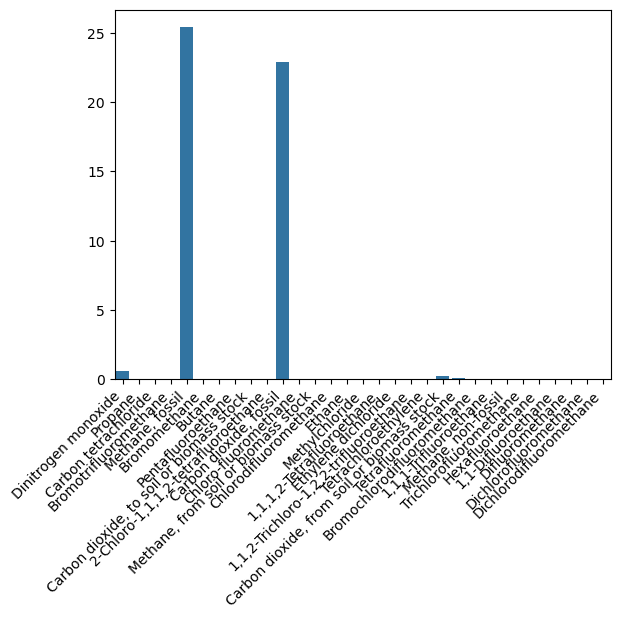

In [26]:
fig, ax = plt.subplots()
sns.barplot(contrib_EF,errorbar=None)
plt.xticks(rotation=45, ha='right');
plt.show()

On peut vérifier nos résultats : 

Regardons la masse de méthane dans notre inventaire et comparons le produit de celle-ci avec un facteur de caractérisation usuel (~28 kgCO2 eq / kg CH4).  

Pour trouver la masse, on fait le même travail que précédemment, mais avec la matrice d'inventaire et non de contribution.

In [9]:
G =lca.inventory # matrice d'inventaire caractérisé ie matrice de contribution

G_EF = G.sum(axis=1) # On fait la somme de chacune des lignes pour avoir la contribution à l'inventaire des EF agrégés sur l'ensemble des procédés
names = [bd.get_node(id = i)['name'] for i in lca.dicts.biosphere.keys()] # On crée la liste des noms des procédés à partir de leur indice
G_EF = {names[i] : float(G_EF[i,0]) for i in range(len(names))} # On crée un dictionnaire avec le nom des EF pour clés et la contribution en valeur
G_EF = { k : v for k,v in G_EF.items() if v!=0} # On supprime les valeurs nulles

On affiche désormais toutes les quantités de méthane de notre inventaire :

In [10]:
print({k : G_EF[k] for k in G_EF.keys() if 'Methane' in str(k)})

{'Methane, fossil': 0.8529966877286822, 'Methane, from soil or biomass stock': 4.8181316102342664e-05, 'Methane, non-fossil': 5.854291050262766e-06, 'Methanesulfonic acid': 6.141556213275472e-10}


In [11]:
masse_methane = .853
CF_usuel = 28
resultat_attendu = masse_methane*CF_usuel
resultat_obtenu = list({k : contrib_EF[k] for k in contrib_EF.keys() if 'Methane' in str(k)}.values())[0]
print('attendu : ',resultat_attendu,'\n','obtenu : ',resultat_obtenu)

attendu :  23.884 
 obtenu :  25.419300643529894


Le résultat attendu est proche de celui obtenu. Vérifions le facteur de caractérisation utilisé pour notre méthode.

In [12]:
methane = {node : node.id for node in biodb if node['name'] == 'Methane, fossil' } # On regarde l'indice des noeuds correspondant au méthane
methane


{'Methane, fossil' (kilogram, None, ('air',)): 190810763095306276,
 'Methane, fossil' (kilogram, None, ('air', 'low population density, long-term')): 190810763489570916,
 'Methane, fossil' (kilogram, None, ('air', 'urban air close to ground')): 190810763594428437,
 'Methane, fossil' (kilogram, None, ('air', 'non-urban air or from high stacks')): 190810763636371495}

In [13]:
C = lca.characterization_matrix # On regarde dans la matrice de caractérisation la valeur qui nous intéresse
C[lca.dicts.biosphere[list(methane.values())[1]],lca.dicts.biosphere[list(methane.values())[1]]]


KeyError: 190810763489570916

### AC des procédés

### AC de groupes de procédés

dont étapes

### AC des procédés de premier niveau

## AC indirecte